## Assignment 4

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial #for part3

## Part 1

Graph shows daily visits to chat.openai.com for 2 months. Using your *manual ruler skills*, convert this graph into at least *20 equally-spaced data points* and store these into a numpy array in your notebook.

Using the **closed-form solution derived in class**, 
    - fit this data  
    - plot the data and the resulting fitted line into the same plot.
    
------------
**closed-form solution**
> Since closed-form solutions are the most straightforward method of determining the optimal solution, they should always be utilized instead of iterative algorithms (numerical methods) wherever possible. They offer precise answers and need less processing power than numerical approaches like gradient descent. In this case, we may compute the slope and intercept of the best-fit line directly rather than employing an iterative method.

reference: https://towardsdatascience.com/closed-form-solution-to-linear-regression-e1fe14c1cbef  // https://medium.com/mlearning-ai/ordinary-least-squares-closed-form-solution-the-dart-way-d7c0ee0e0d02

why np.linspace(0, 1, 20)?: 

- np.linspace = equally spaced data points 

- **(0,1)** = why I defined interval as 0-1? = Its purpose is to **create a simple and normalized dataset** by scaling and fitting the data inside a range of 0 to 1. So = simplifying complex data with large numbers or complex real-world units. 

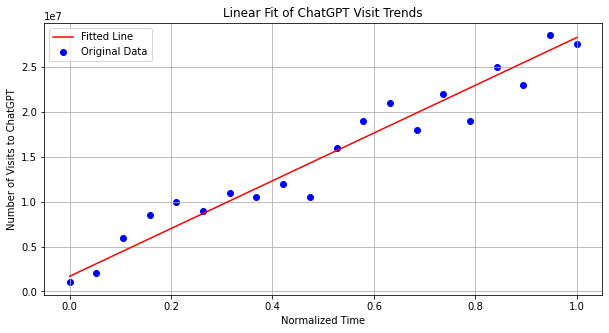

In [2]:
# defining X0 and Y0 to create 20 datapoints 
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0) :: Return evenly spaced numbers over a specified interval
X0 = np.linspace(0, 1, 20)  # generating 20 equally spaced numbers within 0-1 interval. 
# Creating array of manual "estimated y-values" = number of visits to chatGPT at different points in time
Y0 = np.array([
    1_000_000, 2_000_000, 6_000_000, 8_500_000, 10_000_000,
    9_000_000, 11_000_000, 10_500_000, 12_000_000, 10_500_000,
    16_000_000, 19_000_000, 21_000_000, 18_000_000, 22_000_000,
    19_000_000, 25_000_000, 23_000_000, 28_500_000, 27_500_000
])  

# 10_000_000 = 10000000 "_" used for readability of code.

# Using closed-form solution to fit the data (based on class notes)

'''
y=wx+b =
y -> dependent variable 
x -> independent variable
w -> slope of the line
b -> intercept of the line.
'''

# Determining covarience 
# which measures how much two variables change together (key for calculating slope)
cov_XY = np.cov(X0, Y0)

# Using covariances and variances, determine the slope of best fit line
# Variance = how much the data points(x) deviate from the mean
# dividing covariances of X0 and Y0 by variance of X 
w = cov_XY[0, 1] / np.var(X0)
# [0, 1] -> to select the covariance value from the matrix - (variance of X0 and variance of Y0)

'''
Formula for the slope (w) = covariance of X and Y / variance of X
The relationship between the two variables is measured by the slope, 
which indicates how much Y changes for every unit change in X. 
'''

# Using slopes and mean, determine intercepts
# b = value of y when x is zero --> then b is baseline value of the link between x and y
b = np.mean(Y0) - w * np.mean(X0)
# w * np.mean(X0) = calculating expected change in Y0 as a result of X0's average value

# Creating the fitted line
#direct application of (y = wx + b)
fitted_line = w * X0 + b

# Ploting the data and the resulting fitted line into the same plot
plt.figure(figsize=(10, 5))
plt.scatter(X0, Y0, color='blue', label='Original Data')
plt.plot(X0, fitted_line, color='red', label='Fitted Line') # in the slide: plt.plot(dataWithOutlierX, withOutlier * dataWithOutlierX + withOutlierb, label='Fitted line with outliers', color='orange')
# fitted_line -> array of y-values calculated above
# adding title and legend
plt.title('Linear Fit of ChatGPT Visit Trends')
plt.xlabel('Normalized Time')
plt.ylabel('Number of Visits to ChatGPT')
# adding legend and grid 
plt.legend()
plt.grid(True)
plt.show()


"1e7" is equivalent to 1x10^7 which means: 10,000,000

Assuming that this linear fit is correct, when will ChatGPT have 50,000,000 or 1,000,000,000 visits? 

Determine these points numerically, and plot the first point into the same plot [extending the x-axis accordingly].

Discuss whether these time points are meaningful and why.

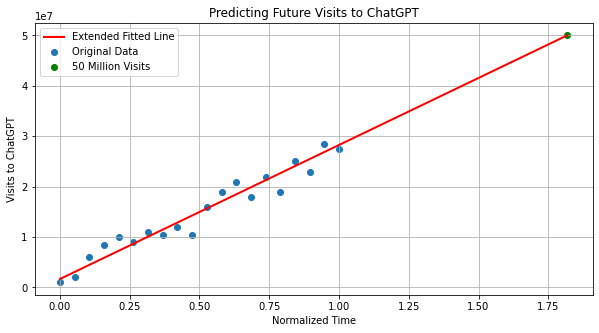

ChatGPT is expected to reach 50,000,000 visits = 1.82
ChatGPT is expected to reach 1,000,000,000 visits = 37.56


In [3]:
# Defining function to predict the time (for the question of when will ChatGPT have 50,000,000 or 1,000,000,000 visits)
def predicting_times(y_value):
# estimating when a specific number of visits (y value) will occur   
    # Using slope (w) and intercept (b)
    # x = (y - b) / w  <--- (y = wx + b)  
    return (y_value - b) / w  

# Using the function I defined above for predicting times (50,000,000 and 1,000,000,000 visits) 
x_50_000_000 = predicting_times(50_000_000)
x_1_000_000_000 = predicting_times(1_000_000_000)

# Extend the x-axis to include the 5 million visit point
# max() = returns the item with the highest value (or in an iterable)
max_x = max(x_50_000_000, X0[-1]) # determining the maximum value between x_50_000_000 - last element in X0 (X0[-1])
# it is used to make sure max_x covers all datapoints ( making sure that graph includes actual data and predicted data)
extended_X0 = np.linspace(0, max_x, len(X0) + 20) # numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0) 
# starts at 0 and goes up to max_x;
# len(X0) + 20 = original time points (x) + 20 additional points to extend graph

# x0 before: X0 = np.linspace(0, 1, 20)
extended_fitted_line = w * extended_X0 + b
# fitted line before: fitted_line = w * X0 + b

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(extended_X0, extended_fitted_line, color= 'red', linewidth=2, label='Extended Fitted Line')
plt.scatter(X0, Y0, label='Original Data')
plt.scatter(x_50_000_000, 50_000_000, label='50 Million Visits', color='green')
plt.xlabel('Normalized Time')
plt.ylabel('Visits to ChatGPT')
plt.title('Predicting Future Visits to ChatGPT')
plt.legend() # adding legend and grid 
plt.grid(True)
plt.show()

# Returning the predicted times 
print(f"ChatGPT is expected to reach 50,000,000 visits = {x_50_000_000:.2f}")
#:.2f:formating number to two decimal places
print(f"ChatGPT is expected to reach 1,000,000,000 visits = {x_1_000_000_000:.2f}")

    X0 = 0 -> November 29, 2022
    X0 = 1 -> February 1, 2023
    then unit of X0 is 3 months
      ChatGPT is expected to reach 50,000,000 visits = 1.82
        Real Time in Months: 
            1.82 x 3 = 5.46 months -> November 29, 2022 + 5.46 months = approximately mid May 2023
      ChatGPT is expected to reach 1,000,000,000 visits = 37.56
            37.56 x 3 = 112.68 months = November 29, 2022 + 112.68 months 

In [4]:
print(f"ChatGPT is expected to reach 50,000,000 visits around mid May 2023")
print(f"ChatGPT is expected to reach 1,000,000,000 visits around {112 // 12} years and {112 % 12} months from November 2022 (April 2031)")

ChatGPT is expected to reach 50,000,000 visits around mid May 2023
ChatGPT is expected to reach 1,000,000,000 visits around 9 years and 4 months from November 2022 (April 2031)


**DISCUSSION**

Before the discussion of the linear fit of mine, I must underline that as of February 2023, ChatGPT had already received 1 billion visits (https://aibusiness.com/nlp/chatgpt-passes-1b-page-views#close-modal).

The number of visits to ChatGPT is assumed to change at a constant rate over time by the linear regression model. In this assignment, we try to see when ChatGPT will reach 50 million and 1 billion visits, assuming that this linear relationship accurately reflects the true dynamics between time and visits. However, before making firm claims about how accurate these predictions are, it is important to consider their validity and reliability.

First of all, given that a linear relationship between variables is assumed in linear regression, our model may not be able to show non-linear relationships in predicting ChatGPT's visitation numbers, since its an AI technology. 

Furthermore, when comparing the times required to reach 50,000,000 and 1,000,000,000 visits, we find that there is a sharp rise up to 50,000,000 visits, followed by a slower rate of increase after that. It might also imply that our linear fit is not the best fit for our data.

The accuracy and significance of the result may also be somewhat diminished because we are predicting 1,000,000,000 visits, which is too far away from the dataset.

Finally, our data is overly simplistic and only has limited amount of data on visit rates, which could make it difficult to represent real-world data or capture its complexity, which would in return result in inaccurate predictions. An AI technology like ChatGPT, visitation rate can be influenced by a wide range of other external factors, such as user engagement, branding, technology, market competition (other AI technologies like Bard and Grok.x), and ext.

## Part 2

Let’s try to fit polynomials to the cosine function.

- Generate datapoints x=[-pi:0.1:pi] and corresponding y-values for the cos-function **[measured in radians, not degrees]**

- Fit the data in a least-squares sense with polynomials of degrees 0 through 10. 

- I want you to use the VANDERMONDE matrix and the NORMAL EQUATIONS for this – take a look at the lecture slides again, please.

- Make one figure with two subplots. 
    - The first subplot contains the original cos-function and all fits.
    - The second subplot has a plot of the norm of the residuals as a function of the polynomial degree.

What is **VANDERMONDE matrix**:

"In order to fit a polynomial of degree n to k data-points (x,y) in a least-squares sense (k>>n), we create the so-called Vandermonde matrix and solve **[class note]**"

For a vector x = [a, b, c], a 3x3 Vandermonde matrix would look like:

V = [1 a a^2]
    [1 b b^2]
    [1 c c^2]
    
Because it simplifies the process, can be applied to any degree of polynomial fitting, and offers a logical, mathematically sound framework, the Vandermonde matrix is helpful for polynomial fitting.
   > Then, using this matrix and **the normal equations** together, one can find the polynomial coefficients that most closely match the data. 

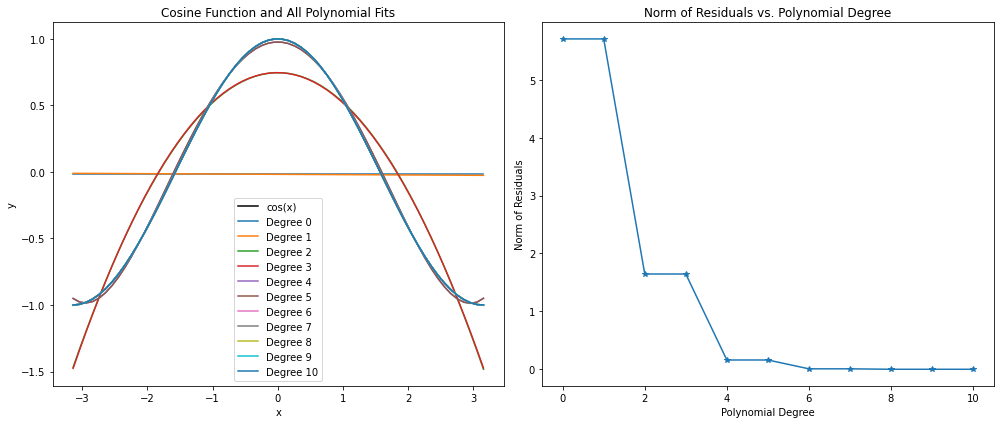

In [5]:
# Generate datapoints x=[-pi:0.1:pi] and corresponding y-values for the cos-function [measured in radians, not degrees]
# x=[-pi:0.1:pi] represents a vector x that starts at −π  ends at π and increase by 0.1 (STEP SIZE) in MATLAB or Octave syntax
# x = np.arange(-np.pi, np.pi, 0.1) is same but in python. HOWEVER IT DOESNT INCLUDE π ENDPOINT!! 
# np.arange(-np.pi, np.pi + 0.1, 0.1) to ensure π is included
x = np.arange(-np.pi, np.pi + 0.1, 0.1) # numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None) = Return evenly spaced values within a given interval
y = np.cos(x) #  calculating cosine of each value in x
# these two are measured radians
# By default all of the trigonometric functions take radians as parameters in NumPy.

# preparing data for polynomial fitting
# Maximum degree of polynomial that I want to fit
max_degree = 10 # max=10 means polynomials of degrees 0 through 10

# Creating an empty list to store norms of the residuals (errors) for each polynomial degree
# For second subplot which has a plot of the norm of the residuals as a function of the polynomial degree
residual_norms = []
# Residuals are the differences between actual and predicted data points, revealing the accuracy of a polynomial fit.
        # overall error of the polynomial fit --> measured by "the norm of residuals

# creating empty list to store coefficients for each polynomial degree
coefficients = {}

# preparing the figure : one figure with two subplots
plt.figure(figsize=(14, 6))

# First subplot: contains the original cos-function and all fits
plt.subplot(1, 2, 1) # 1 row and 2 columns and first subplot

# Ploting the original cosine function which is baseline for comparison between original cos-function and all fits
plt.plot(x, y, label='cos(x)', color='black')  

# Fit the data in a least-squares sense with polynomials of degrees 0 through 10
for degree in range(max_degree + 1): # iterating over 0 to max degree
    # Creating Vandermonde matrix
    A = np.vander(x, degree + 1) # numpy.vander(x, N=None, increasing=False) : Generate a Vandermonde matrix
    # x: vector, N: columns, 
    # degree+1 = degree 1 - 2 coefficients, degree 2 - 3 coefficients = degree n requires n + 1 coefficients
    
    # Compute the coefficients using normal equations: (A^T A)^(-1) A^T b
    # class notes: min||Ax-b||^2 , xopt=(AT.A)^-1 AT b [assumes inverse (ATA)^-1 exists]
    coeffs = np.linalg.inv(A.T @ A) @ A.T @ y # np.linalg.inv(a) : Compute the inverse of a matrix
    # A = Vandermonde matrix
    # A.T = transpose of the Vandermonde matrix (transposed matrix, rows are converted to columns)
    # @ = matrix multiplication
    # inverse of (A.T @ A) = (A.T @ A)^(-1)
    # y = vector of observed outcomes / cosine values
    
    # Storing coefficients
    coefficients[degree] = coeffs    
    
    # Generating the fitted polynomial values
    y_fit = A @ coeffs
    # calculating and evaluating the polynomial's value at each x data point by this multiplication
    # b_fit: array of y-values representing the outcomes of the polynomial equation at each x-value 
    # It will help to see how well the polynomial fits the original data when I plotting y_fit against x

    
    # Plotting the polynomial fit 
    plt.plot(x, y_fit, label=f'Degree {degree}')

    # Calculating and store the norm of the residuals
    residual_norms.append(np.linalg.norm(y - y_fit)) # linalg.norm(x, ord=None, axis=None, keepdims=False) : This function is able to return one of eight different matrix norms, or one of an infinite number of vector norms [source: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html]
    # np.linalg.norm = calculates the Euclidean norm (L2 norm)
    # residuals(overall error of the fit) = differences between actual y values and fitted y values
    
plt.title('Cosine Function and All Polynomial Fits')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Second subplot: Norm of residuals
plt.subplot(1, 2, 2) # 1 row and 2 columns and second subplot
# ploting how the error in polynomial fitting changes with the degree of the polynomial
plt.plot(range(max_degree + 1), residual_norms, marker='*') 
# x = 0 to max degree (including max degree) -- y =  residual_norms
plt.title('Norm of Residuals vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Norm of Residuals')

# Showing the figure
plt.tight_layout() #adjusting layout
plt.show()


Now take a look at the coefficients of the polynomials. What can you say? Let us say that I only give you 11 chances to fit a polynomial to the cos-function – how can you use your observation to produce a better fit than with the 11 fits you just did??
Make sure to include detailed observations and interpretations!


In [9]:
# Printing the coefficients  of the polynomials
for degree, coeffs in coefficients.items(): # coefficients.items()=returning value pairs in the dictionary (degree and coeffs)
    print(f"Degree {degree}: Coefficients {coeffs}")

Degree 0: Coefficients [-0.01824888]
Degree 1: Coefficients [-0.00241556 -0.01822857]
Degree 2: Coefficients [-0.22384046  0.00134825  0.74561119]
Degree 3: Coefficients [ 0.00076799 -0.22385983 -0.00336746  0.74565084]
Degree 4: Coefficients [ 2.57192090e-02 -9.69267145e-05 -4.49351276e-01  4.24229960e-04
  9.76229630e-01]
Degree 5: Coefficients [-4.68012414e-05  2.57211763e-02  4.34624305e-04 -4.49364684e-01
 -7.39729400e-04  9.76239416e-01]
Degree 6: Coefficients [-9.81734529e-04  2.72145217e-06  3.93941356e-02 -2.52122504e-05
 -4.95899711e-01  4.28077910e-05  9.98858166e-01]
Degree 7: Coefficients [ 1.23045110e-06 -9.81806943e-04 -1.75590515e-05  3.93949882e-02
  6.88168579e-05 -4.95902083e-01 -6.37277370e-05  9.98859062e-01]
Degree 8: Coefficients [ 1.89133200e-05 -4.16355587e-08 -1.34161434e-03  5.92359753e-07
  4.15098892e-02 -2.31451841e-06 -4.99818570e-01  2.13684484e-06
  9.99966786e-01]
Degree 9: Coefficients [-1.81479110e-08  1.89146931e-05  3.49512495e-07 -1.34163736e-03
 

Before starting to discuss coefficients of polynomials, I need to make sure what is coefficients and polynomial.
- polynomial: 3x^2 + 4x + 1 
- coefficients of polynomial: 3, 4, 1 
    - which the behavior of a polynomial can be inferred by using the values of its coefficients. (such as linear term determining slope; quadric terms of polynomial determining shape of polynomial graph...)

When analyzing the coefficient of polynomials, it is important to look its magnitude, consistency, patterns, and significance. Determining whether the magnitudes of the coefficients increase or decrease with degree is important. There are several methods to assess the magnitude of coefficients, such as examining the absolute and relative values of the coefficients.

Significant increase of magnitudes of the coefficients in higher degrees = indication of overfitting.(overfitting: polynomial begins to fit the data's "noise" instead of the underlying trend). 

Decrease of magnitudes of the coefficients in higher degrees = having smaller effect on the actual value.

Furthermore, it's important to search for patterns/trends and consistency because lower-degree polynomials might not accurately reflect the data. But as the degree increases, the polynomial begins to resemble the function more and more. 

Summary:

    higher degree polynomials;
        - can fit the data more closely
        - but may start to fit the noise rather than trend
    lower degree polynomials;
        - simple and generalize better 
        - but not showing complexity of data

Finally, since we only have 11 chances to fit the data, it would be better to start with the middle degree polynomials (4-5-6) rather than 0. It would help with both overfitting and underfitting and produce a better fit. The next stage after fitting a middle-degree polynomial would be to examine the residuals and make any required modifications based on results.

## Part 3

Create two numpy arrays funded and non_funded and fill them with the data. 
Then fit this data with polynomials from degree 1 until 7, using the Vandermonde method

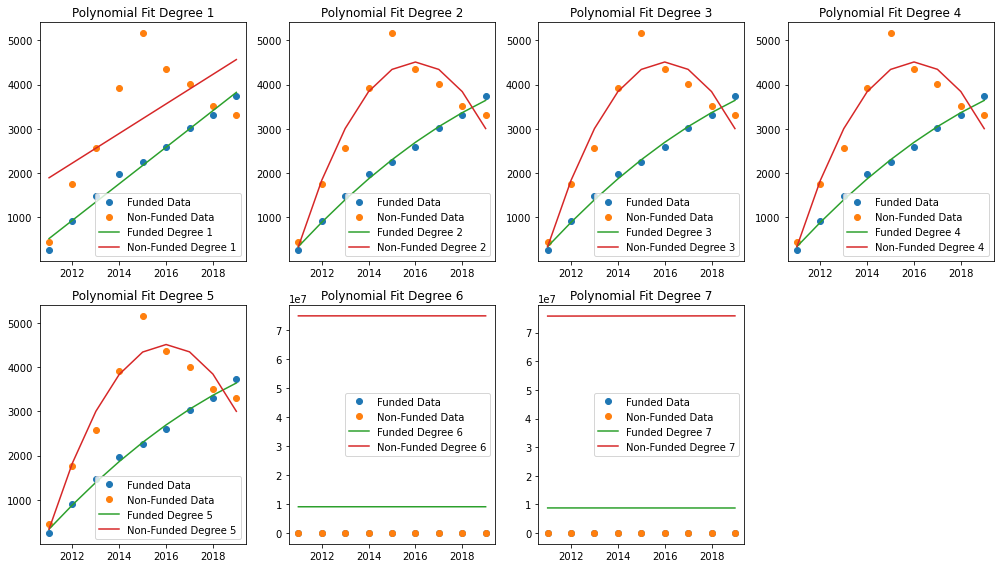

([array([ 4.13333333e+02, -8.30697444e+05]),
  array([-1.94458874e+01,  7.87802597e+04, -7.97852462e+07]),
  array([-9.74597193e-03,  3.94808713e+01, -3.99819464e+04, -5.95265930e+01]),
  array([-4.88392100e-06,  1.97834898e-02, -2.00333329e+01, -2.98263405e-02,
         -2.96043566e-05]),
  array([-2.44714116e-09,  9.91212080e-06, -1.00366913e-02, -1.49429727e-05,
         -1.48317476e-08, -1.22677993e-11]),
  array([ 1.22476846e-13, -1.55699718e-09,  3.18839717e-06,  2.13670771e-09,
          8.25375939e-13,  3.98018442e-17, -2.89424212e-19]),
  array([-6.82533015e-18,  1.30798169e-13, -1.66459628e-09,  3.40866927e-06,
          2.28452438e-09,  8.82613690e-13,  4.26835987e-17, -3.09378365e-19])],
 [array([ 3.34183333e+02, -6.70151639e+05]),
  array([-1.67141775e+02,  6.73915536e+05, -6.79302250e+08]),
  array([-8.30256804e-02,  3.34758633e+02, -3.37433298e+05, -5.02383111e+02]),
  array([-4.12417131e-05,  1.66285770e-01, -1.67613999e+02, -2.49549701e-01,
         -2.47692416e-04]),


In [7]:
# Data for funded and non-funded projects from 2011 to 2019
funded = np.array([249, 912, 1478, 1978, 2255, 2598, 3022, 3300, 3731])
non_funded = np.array([447, 1757, 2569, 3922, 5160, 4360, 4007, 3516, 3312])

# Years from 2011 to 2019
years = np.array(range(2011, 2020))

# Creating an empty list to store norms of the coefficients
# adding this to examine values of coefficients 
coefficients_funded = []
coefficients_non_funded = []

# preparing the figure
plt.figure(figsize=(14, 8))

for degree in range(1, 8):
    # Generating a Vandermonde matrix for polynomials from degree 1 until 7
    vander_funded = np.vander(years, degree + 1)
    vander_non_funded = np.vander(years, degree + 1)
    # numpy.vander(x, N=None, increasing=False) : Generate a Vandermonde matrix
    # x: vector, N: columns, 
    # degree+1 = degree 1 - 2 coefficients, degree 2 - 3 coefficients = degree n requires n + 1 coefficients
    
    # performing a linear least squares fitting which finds the best-fitting solution to a set of linear equations in a least-squares sense
    # simply "finding equation of a line that best fits a set of points"
    coefs_funded = np.linalg.lstsq(vander_funded, funded, rcond=None)[0]
    coefs_non_funded = np.linalg.lstsq(vander_non_funded, non_funded, rcond=None)[0]
    # m, c = np.linalg.lstsq(A, y, rcond=None)[0] : Return the least-squares solution to a linear matrix equation 
    # [0]: first element of output (it contains polynomial coefficients)
    # coefs_funded / non_funded as a result: contains the polynomial coefficients that best fit the funded / non_funded data.
    
    # Storing the coefficients in list
    coefficients_funded.append(coefs_funded)
    coefficients_non_funded.append(coefs_non_funded)

    # constructing polynomial objects by utilizing the coefficients acquired from the least squares fitting above
    poly_funded = Polynomial(coefs_funded[::-1])
    poly_non_funded = Polynomial(coefs_non_funded[::-1])
    # best-fitting polynomial equations for both funded and unfunded data are represented by polynomial objects
    # [::-1] = reversing order of the coefficients 
    # "polynomial" wants --> coefficients in the order of increasing powers, "np.linalg.lstsq" returns -> descending order
    
    """ why we dont use np.polyder but use Polynomial function?:
        as our aim is to evaluate the polynomial for prediction and plotting purposes;
        Polynomial function used to  quickly compute the value of the polynomial at different years.
        np.polyder is not useful for that
    """
    
    # coefs_funded: define polynomial, but do not represent polynomial's values at specific years
    # poly_funded: compute value of the polynomial for each year 

    # Plot the original data and the fitted polynomial
    plt.subplot(2, 4, degree)
    plt.plot(years, funded, 'o', label='Funded Data')
    plt.plot(years, non_funded, 'o', label='Non-Funded Data')
    plt.plot(years, poly_funded(years), label=f'Funded Degree {degree}')
    plt.plot(years, poly_non_funded(years), label=f'Non-Funded Degree {degree}')
    plt.title(f'Polynomial Fit Degree {degree}')
    plt.legend()

plt.tight_layout()
plt.show()

coefficients_funded, coefficients_non_funded
# printing results to see coefficients

**Which of the models do you think fits the data best for each of the two datasets 
(remember the compromise between fit quality and generalizability!!!)? Do the degrees differ? Why would they? 
Why would they not?
Plot the measured data points, along with your best-fit model into the same plot.
Using your model as a predictor model, how many projects will be funded and non-funded in 2023? 
Plot these points as well into the same plot.
Make sure to include detailed observations and interpretations!**

As we argued in part 2: 

    higher degree polynomials;
        - can fit the data more closely
        - but may start to fit the noise rather than trend
    lower degree polynomials;
        - simple and generalize better 
        - but not showing complexity of data

then choosing middle degree polynomial would be better for both funded and non-funded. That's why i chose *degree 3*

#### **even though it is not written to plot all fits for the data, I did it to visualize plots and also see written coefficients, and then to choose best fit as I couldn't solve the mistake (future prediction being negative)**

#### based on my research about coefficients, it is best to use middle degree polynomials, such as degree 3. However, final result is not making sense. If I choose degree 1, it gives positive result but it is also not logical.

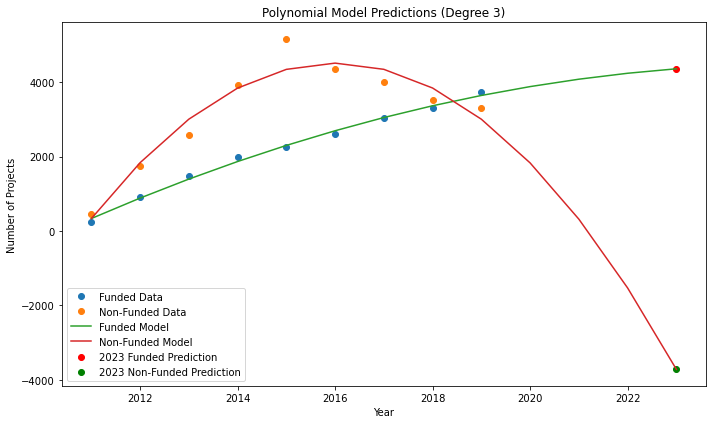

(4357.629722997656, -3715.639312055856)

In [8]:
# Year for prediction
prediction_year = 2023

# Choosing best-fit model degree (based on the coefficients and plots)
best_fit_degree = 3

# extended array which includes the prediction year 2023 for plotting
# 2011 to 2023
extended_years = np.array(range(2011, prediction_year + 1))

# Using the best-fit model (degree 3) coefficients + creating "polynomial objects" for prediction
poly_funded_best = Polynomial(coefficients_funded[best_fit_degree - 1][::-1])
poly_non_funded_best = Polynomial(coefficients_non_funded[best_fit_degree - 1][::-1])
# coefficients_funded[best_fit_degree - 1]: choosing the coefficients for funded that correspond to the best-fit polynomial degree
# -1: as python 0 based, -1 used to choose 3rd degree [0,1,2] 2=3rd degree
# [::-1] = reversing order of the coefficients 

# calculating predicted number of projects in 2023
predicted_funded_2023 = poly_funded_best(prediction_year)
predicted_non_funded_2023 = poly_non_funded_best(prediction_year)

# Updating the plot with predictions
plt.figure(figsize=(10, 6))
plt.plot(years, funded, 'o', label='Funded Data')
plt.plot(years, non_funded, 'o', label='Non-Funded Data')
# ploting polynomial model
plt.plot(extended_years, poly_funded_best(extended_years), label='Funded Model') 
plt.plot(extended_years, poly_non_funded_best(extended_years), label='Non-Funded Model')
# scattering the point of prediction for the year 2023 
plt.scatter(prediction_year, predicted_funded_2023, color='red', label='2023 Funded Prediction')
# x axis-prediction_year is 2023
# y axis-predicted number of funded projects in the year 2023
plt.scatter(prediction_year, predicted_non_funded_2023, color='green', label='2023 Non-Funded Prediction')
plt.title(f'Polynomial Model Predictions (Degree {best_fit_degree})')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.legend()
plt.tight_layout()
plt.show()

predicted_funded_2023, predicted_non_funded_2023